In [1]:
from sklearn import svm
import pandas as pd
import numpy as np
from sklearn import metrics
from matplotlib import pyplot as plt


In [2]:
df = pd.read_csv('genepresenceabsencefiltered.csv', index_col = 0, sep = ';')

/home/lf481323/.conda/envs/pan_env/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3072: DtypeWarning: Columns (14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,2

In [3]:
df

,Non-unique Gene name,Annotation,No. isolates,No. sequences,Avg sequences per isolate,Genome Fragment,Order within Fragment,Accessory Fragment,Accessory Order with Fragment,QC,...,61346_KN13_116,61347_05_590_19,61348_08_590_256,61353_IN_09_3875,61354_IN_09_3830,61379_WHO_Z,61380_BEL_10_3,61381_989000041,61382_IC_CNR077,61383_IC_15039
Gene,,,,,,,,,,,,,,,,,,,,,
group_1034,NaN,Type IV pilus assembly protein PilM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cysNC,NaN,Bifunctional enzyme CysN/CysC,414.0,414.0,1.0,1.0,1874.0,52.0,1.0,NaN,...,g61346_00669,g61347_00331,g61348_01910,g61353_00249,g61354_00254,g61379_00338,g61380_00227,g61381_00179,g61382_00291,g61383_00205
group_1277,NaN,Inner membrane protein,414.0,414.0,1.0,1.0,3035.0,15.0,3.0,NaN,...,g61346_00555,g61347_00650,g61348_00939,g61353_00454,g61354_00411,g61379_00419,g61380_00572,g61381_01673,g61382_00550,g61383_00520
group_1352,NaN,hypothetical protein,414.0,414.0,1.0,1.0,2655.0,35.0,2.0,NaN,...,g61346_01119,g61347_01122,g61348_01062,g61353_01108,g61354_01255,g61379_00964,g61380_01286,g61381_00995,g61382_01220,g61383_01079
group_1405,NaN,hypothetical protein,414.0,414.0,1.0,1.0,749.0,147.0,1.0,Hypothetical protein with no hits to refseq/un...,...,g61346_01710,g61347_01675,g61348_01758,g61353_01788,g61354_01744,g61379_01510,g61380_01823,g61381_01605,g61382_01791,g61383_01817
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
group_3844,NaN,hypothetical protein,1.0,1.0,1.0,1.0,2817.0,927.0,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,g61382_00949,NaN
group_3845,pilE_2,Fimbrial protein,1.0,1.0,1.0,1.0,668.0,2.0,147.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,g61382_01677,NaN
group_3846,pilE_4,Fimbrial protein,1.0,1.0,1.0,1.0,37.0,2.0,519.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,g61382_01763,NaN


In [4]:
cols = [0,1,2,3,4,5,6,7,8,9,10,11,12]
df.columns[cols]

Index(['Non-unique Gene name', 'Annotation', 'No. isolates', 'No. sequences',
       'Avg sequences per isolate', 'Genome Fragment', 'Order within Fragment',
       'Accessory Fragment', 'Accessory Order with Fragment', 'QC',
       'Min group size nuc', 'Max group size nuc', 'Avg group size nuc'],
      dtype='object')

In [5]:
df.drop(df.columns[cols], 1, inplace=True)
gene = df.fillna(0)

In [6]:
gene = gene.astype(bool).astype(int)
gene = gene.rename(columns=lambda x: x.split('_')[0])

In [7]:
geneT = gene.T.astype(int)
geneT

Gene,group_1034,cysNC,group_1277,group_1352,group_1405,group_1784,group_2013,group_2063,folP,group_340,...,group_3839,group_3840,group_3841,group_3842,group_3843,group_3844,group_3845,group_3846,group_3847,group_3848
2855,0,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
13685,0,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
27228,0,0,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
31457,0,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
31458,0,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61379,0,1,1,1,1,1,1,1,1,1,...,1,1,1,1,0,0,0,0,0,0
61380,0,1,1,1,1,1,1,1,1,1,...,0,0,0,0,1,0,0,0,0,0
61381,0,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
61382,0,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,1,1,1,0,0


In [8]:
lineage = pd.read_csv('lineages.csv',sep='\t', index_col = 0)
lineage = lineage.set_index(geneT.index)
lineage


,lineage
2855,1
13685,1
27228,1
31457,1
31458,1
...,...
61379,0
61380,0
61381,0
61382,0


In [9]:
from sklearn import preprocessing


In [10]:
data = geneT.join(lineage)

In [11]:
#data.to_csv('gene_oneHotEncoding.csv')

In [12]:
scoary =  pd.read_csv('lineage_11_10_2021_1536.results.csv')

In [13]:
scoary

,Gene,Non-unique Gene name,Annotation,Number_pos_present_in,Number_neg_present_in,Number_pos_not_present_in,Number_neg_not_present_in,Sensitivity,Specificity,Odds_ratio,Naive_p,Bonferroni_p,Benjamini_H_p,Max_Pairwise_comparisons,Max_supporting_pairs,Max_opposing_pairs,Best_pairwise_comp_p,Worst_pairwise_comp_p
0,group_1024,NaN,Phosphoribosyl transferase domain protein,269,28,29,93,90.268456,76.859504,30.809113,1.492311e-41,5.254428e-38,1.751476e-38,14,13,4,0.001831,0.179565
1,group_1706,NaN,hypothetical protein,269,28,29,93,90.268456,76.859504,30.809113,1.492311e-41,5.254428e-38,1.751476e-38,14,13,4,0.001831,0.179565
2,group_1483,NaN,hypothetical protein,29,93,269,28,9.731544,23.140496,0.032458,1.492311e-41,5.254428e-38,1.751476e-38,14,4,13,0.001831,0.179565
3,group_2315,NaN,hypothetical protein,51,97,247,24,17.114094,19.834711,0.051087,2.464226e-34,8.676538e-31,2.169135e-31,16,5,13,0.021271,0.210114
4,group_2283,NaN,hypothetical protein,38,87,260,34,12.751678,28.099174,0.057118,6.944336e-32,2.445101e-28,4.890201e-29,10,5,6,0.753906,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
574,group_1549,tbpB_2,Transferrin-binding protein 2,3,5,295,116,1.006711,95.867769,0.235932,4.801767e-02,1.000000e+00,2.940352e-01,5,3,2,1.000000,1.000000
575,group_1130,NaN,hypothetical protein,279,119,19,2,93.624161,1.652893,0.246793,4.849826e-02,1.000000e+00,2.964624e-01,6,1,5,0.218750,0.218750
576,group_2539,NaN,hypothetical protein,38,25,260,96,12.751678,79.338843,0.561231,4.953061e-02,1.000000e+00,3.022483e-01,9,7,4,0.179688,1.000000
577,moeB,NaN,Molybdopterin-synthase adenylyltransferase,283,108,15,13,94.966443,10.743802,2.270988,4.976542e-02,1.000000e+00,3.031558e-01,9,7,6,0.179688,0.507812


In [16]:
scoary_gene_filt =geneT.filter(scoary['Gene'])

In [19]:
scoary_gene_norm = scoary_gene_filt.div(scoary_gene_filt.sum(axis=1), axis=0)
scoary_gene_norm

Gene,group_1024,group_1706,group_1483,group_2315,group_2283,group_2316,group_410,group_789,group_948,aplIM_2,...,group_90,group_366,group_349,bla,gspA,group_1549,group_1130,group_2539,moeB,group_2785
2855,0.000000,0.000000,0.008264,0.008264,0.000000,0.008264,0.008264,0.008264,0.000000,0.008264,...,0.0,0.0,0.000,0.000000,0.008264,0.0,0.008264,0.000000,0.008264,0.0
13685,0.004785,0.004785,0.000000,0.000000,0.000000,0.000000,0.004785,0.004785,0.000000,0.004785,...,0.0,0.0,0.000,0.000000,0.004785,0.0,0.004785,0.000000,0.004785,0.0
27228,0.005155,0.005155,0.000000,0.005155,0.005155,0.005155,0.005155,0.005155,0.000000,0.005155,...,0.0,0.0,0.000,0.000000,0.005155,0.0,0.005155,0.000000,0.000000,0.0
31457,0.005076,0.005076,0.000000,0.000000,0.000000,0.000000,0.005076,0.005076,0.000000,0.005076,...,0.0,0.0,0.000,0.000000,0.005076,0.0,0.005076,0.000000,0.005076,0.0
31458,0.005155,0.005155,0.000000,0.000000,0.000000,0.000000,0.005155,0.005155,0.000000,0.005155,...,0.0,0.0,0.000,0.000000,0.005155,0.0,0.005155,0.000000,0.005155,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61379,0.005495,0.005495,0.000000,0.000000,0.000000,0.005495,0.005495,0.005495,0.000000,0.005495,...,0.0,0.0,0.000,0.000000,0.005495,0.0,0.005495,0.000000,0.005495,0.0
61380,0.005000,0.005000,0.000000,0.005000,0.005000,0.005000,0.005000,0.005000,0.000000,0.005000,...,0.0,0.0,0.005,0.000000,0.005000,0.0,0.005000,0.000000,0.005000,0.0
61381,0.006024,0.006024,0.000000,0.000000,0.000000,0.000000,0.006024,0.006024,0.000000,0.006024,...,0.0,0.0,0.000,0.006024,0.006024,0.0,0.006024,0.000000,0.006024,0.0
61382,0.000000,0.000000,0.005917,0.005917,0.000000,0.005917,0.000000,0.000000,0.005917,0.000000,...,0.0,0.0,0.000,0.005917,0.005917,0.0,0.005917,0.005917,0.005917,0.0


In [38]:
lineage = lineage.set_index(scoary_gene_norm.index)

In [32]:
#KMeans
from sklearn.cluster import KMeans
import numpy as np


In [24]:
# Gap Statistic for K means
def optimalK(data, nrefs=3, maxClusters=15):
    """
    Calculates KMeans optimal K using Gap Statistic 
    Params:
        data: ndarry of shape (n_samples, n_features)
        nrefs: number of sample reference datasets to create
        maxClusters: Maximum number of clusters to test for
    Returns: (gaps, optimalK)
    """
    gaps = np.zeros((len(range(1, maxClusters)),))
    resultsdf = pd.DataFrame({'clusterCount':[], 'gap':[]})
    for gap_index, k in enumerate(range(1, maxClusters)):
# Holder for reference dispersion results
        refDisps = np.zeros(nrefs)
# For n references, generate random sample and perform kmeans getting resulting dispersion of each loop
        for i in range(nrefs):
            
            # Create new random reference set
            randomReference = np.random.random_sample(size=data.shape)
            
            # Fit to it
            km = KMeans(k)
            km.fit(randomReference)
            
            refDisp = km.inertia_
            refDisps[i] = refDisp
# Fit cluster to original data and create dispersion
        km = KMeans(k)
        km.fit(data)
        
        origDisp = km.inertia_
# Calculate gap statistic
        gap = np.log(np.mean(refDisps)) - np.log(origDisp)
# Assign this loop's gap statistic to gaps
        gaps[gap_index] = gap
        
        resultsdf = resultsdf.append({'clusterCount':k, 'gap':gap}, ignore_index=True)
    return (gaps.argmax() + 1, resultsdf)


Text(0.5, 1.0, 'Gap Statistic vs. K')

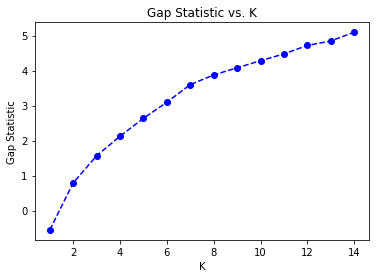

In [80]:
score_g, df = optimalK(scoary_gene_norm, nrefs=5, maxClusters=15)
plt.plot(df['clusterCount'], df['gap'], linestyle='--', marker='o', color='b')
plt.xlabel('K')
plt.ylabel('Gap Statistic')
plt.title('Gap Statistic vs. K')

In [81]:
df['gap'].idxmax()

13

In [83]:
kmeans = KMeans(n_clusters=13, random_state=0).fit(scoary_gene_norm)

In [84]:
kmeans.labels_

array([ 3,  6, 12, 11, 10, 10,  6, 11, 10, 11,  1,  5,  6, 12,  7, 10, 10,
       10,  8,  6,  6,  6,  0,  6,  2,  1,  4,  6,  0,  9,  6,  6,  6,  3,
        6,  5, 11,  8,  7,  9, 10, 10,  8,  4,  4,  1,  0,  6,  6, 10, 10,
       11,  2, 10,  8,  7,  4,  8, 10, 10, 10, 10,  6,  4,  1,  5,  5,  6,
        9, 11,  9,  9,  1,  7,  7,  1,  1,  1,  9,  1,  7,  5,  8,  2,  2,
        2, 10, 10,  4,  6,  1,  3,  9,  9,  7,  3,  1,  9,  6,  9,  0,  6,
        6,  5,  6, 10,  7, 12, 11,  0,  0,  6, 12,  8,  5,  2,  2, 11, 11,
       11,  9,  8, 12, 11,  6,  2,  8,  5,  0,  2,  7,  6,  2,  7,  6,  6,
       12, 10, 10, 10, 10,  6,  2, 10,  1,  5,  6, 11,  6,  6,  6, 12, 10,
       10, 11, 10,  5, 10,  6,  9,  8,  1,  6,  6,  4, 11, 10,  6, 10,  8,
        3,  8,  7,  1,  4, 11,  6,  8, 10,  6, 10, 10, 10,  7, 11, 10,  1,
        9,  8, 10,  8, 10, 10, 10,  2,  8,  4,  9,  2,  9,  5,  5,  2,  1,
        6,  4,  7, 11,  1,  9,  1,  9,  9,  1, 12,  9,  5,  5, 10,  9,  5,
        7,  5,  6, 11,  8

In [99]:
scoary_gene_filt['cluster'] = pd.Series(kmeans.labels_, index=scoary_gene_filt.index)

In [101]:
scoary_gene_filt

Gene,group_1024,group_1706,group_1483,group_2315,group_2283,group_2316,group_410,group_789,group_948,aplIM_2,...,group_366,group_349,bla,gspA,group_1549,group_1130,group_2539,moeB,group_2785,cluster
2855,0,0,1,1,0,1,1,1,0,1,...,0,0,0,1,0,1,0,1,0,3
13685,1,1,0,0,0,0,1,1,0,1,...,0,0,0,1,0,1,0,1,0,6
27228,1,1,0,1,1,1,1,1,0,1,...,0,0,0,1,0,1,0,0,0,12
31457,1,1,0,0,0,0,1,1,0,1,...,0,0,0,1,0,1,0,1,0,11
31458,1,1,0,0,0,0,1,1,0,1,...,0,0,0,1,0,1,0,1,0,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61379,1,1,0,0,0,1,1,1,0,1,...,0,0,0,1,0,1,0,1,0,11
61380,1,1,0,1,1,1,1,1,0,1,...,0,1,0,1,0,1,0,1,0,6
61381,1,1,0,0,0,0,1,1,0,1,...,0,0,1,1,0,1,0,1,0,7
61382,0,0,1,1,0,1,0,0,1,0,...,0,0,1,1,0,1,1,1,0,3


In [102]:
Xcl = scoary_gene_filt.join(lineage)

In [103]:
X = Xcl.drop(columns = ['cluster'])

In [104]:
X

,group_1024,group_1706,group_1483,group_2315,group_2283,group_2316,group_410,group_789,group_948,aplIM_2,...,group_366,group_349,bla,gspA,group_1549,group_1130,group_2539,moeB,group_2785,lineage
2855,0,0,1,1,0,1,1,1,0,1,...,0,0,0,1,0,1,0,1,0,1
13685,1,1,0,0,0,0,1,1,0,1,...,0,0,0,1,0,1,0,1,0,1
27228,1,1,0,1,1,1,1,1,0,1,...,0,0,0,1,0,1,0,0,0,1
31457,1,1,0,0,0,0,1,1,0,1,...,0,0,0,1,0,1,0,1,0,1
31458,1,1,0,0,0,0,1,1,0,1,...,0,0,0,1,0,1,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61379,1,1,0,0,0,1,1,1,0,1,...,0,0,0,1,0,1,0,1,0,0
61380,1,1,0,1,1,1,1,1,0,1,...,0,1,0,1,0,1,0,1,0,0
61381,1,1,0,0,0,0,1,1,0,1,...,0,0,1,1,0,1,0,1,0,0
61382,0,0,1,1,0,1,0,0,1,0,...,0,0,1,1,0,1,1,1,0,0


In [105]:
scoary_gene_norm.sort_values(['cluster'])

Gene,group_1024,group_1706,group_1483,group_2315,group_2283,group_2316,group_410,group_789,group_948,aplIM_2,...,group_366,group_349,bla,gspA,group_1549,group_1130,group_2539,moeB,group_2785,cluster
31562,0.000000,0.000000,0.004405,0.004405,0.004405,0.004405,0.004405,0.004405,0.004405,0.000000,...,0.004405,0.000000,0.0,0.004405,0.0,0.004405,0.0,0.004405,0.0,0
31783,0.000000,0.000000,0.004878,0.004878,0.004878,0.004878,0.004878,0.004878,0.004878,0.000000,...,0.000000,0.000000,0.0,0.004878,0.0,0.004878,0.0,0.004878,0.0,0
31500,0.000000,0.000000,0.005102,0.005102,0.000000,0.005102,0.005102,0.005102,0.005102,0.000000,...,0.000000,0.000000,0.0,0.005102,0.0,0.005102,0.0,0.005102,0.0,0
31571,0.000000,0.000000,0.004785,0.004785,0.004785,0.004785,0.004785,0.004785,0.004785,0.000000,...,0.000000,0.000000,0.0,0.004785,0.0,0.004785,0.0,0.004785,0.0,0
31970,0.000000,0.000000,0.004566,0.004566,0.004566,0.004566,0.004566,0.004566,0.000000,0.004566,...,0.000000,0.000000,0.0,0.004566,0.0,0.004566,0.0,0.004566,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31977,0.005155,0.005155,0.000000,0.005155,0.005155,0.005155,0.005155,0.005155,0.000000,0.005155,...,0.000000,0.005155,0.0,0.005155,0.0,0.005155,0.0,0.005155,0.0,12
31980,0.000000,0.000000,0.005181,0.005181,0.005181,0.005181,0.005181,0.005181,0.000000,0.005181,...,0.000000,0.005181,0.0,0.005181,0.0,0.005181,0.0,0.005181,0.0,12
31981,0.000000,0.000000,0.005263,0.005263,0.005263,0.005263,0.005263,0.005263,0.000000,0.005263,...,0.000000,0.005263,0.0,0.005263,0.0,0.005263,0.0,0.005263,0.0,12
61337,0.005464,0.005464,0.000000,0.005464,0.005464,0.005464,0.005464,0.005464,0.000000,0.005464,...,0.000000,0.000000,0.0,0.005464,0.0,0.005464,0.0,0.000000,0.0,12


In [114]:
#costruisco 33 dataframe con geni + lineage (1 per ogni cluster)
ncluster = 33
selected_feat = dict()
for i in range(ncluster):
    temp = 'df_' + str(i) 
    vars()[temp]  = Xcl[Xcl['cluster'] == i]
   

In [ ]:
 train, test = train_test_split(X.filter(vars()[temp].index, axis = 0), test_size = 0.2)
    X_train = train.iloc[:,:-1].to_numpy()
    X_test = test.iloc[:,:-1].to_numpy()
    y_train = train['lineage'].to_numpy()
    y_test = test['lineage'].to_numpy()
    sel_ = SelectFromModel(LogisticRegression(C=1, penalty='l1', solver='liblinear'))
    sel_.fit(X_train, np.ravel(y_train,order='C'))
    sel_.get_support()
    X_train= pd.DataFrame(X_train)
    X_train.columns[(sel_.get_support())]

In [108]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso, LogisticRegression
from sklearn.feature_selection import SelectFromModel
#identifico geni importanti in ogni cluster con lasso logistic regression
train, test = train_test_split(X.filter(df_1.index, axis = 0), test_size = 0.2)
X_train = train.iloc[:,:-1].to_numpy()
X_test = test.iloc[:,:-1].to_numpy()
y_train = train['lineage'].to_numpy()
y_test = test['lineage'].to_numpy()

In [109]:
sel_ = SelectFromModel(LogisticRegression(C=1, penalty='l1', solver='liblinear'))
sel_.fit(X_train, np.ravel(y_train,order='C'))
sel_.get_support()
X_train = pd.DataFrame(X_train)
selected_feat = X_train.columns[(sel_.get_support())]

In [110]:
print('total features: {}'.format((X_train.shape[1])))
print('selected features: {}'.format(len(selected_feat)))
print('features with coefficients shrank to zero: {}'.format(
np.sum(sel_.estimator_.coef_ == 0)))

total features: 578
selected features: 6
features with coefficients shrank to zero: 572
